<div class="alert alert-info">
*Objective of this sheet*
</div>


* Introduction to Groupby
* Dealing with multiindex
* Renaming a multindex
* How to use the transpose
* Swaping (swaplevel)the multindex
* Stacking
* Getting the random sample out of the DataFrame

In [39]:
import pandas as pd
fortune = pd.read_csv('fortune1000.csv', index_col = 'Rank')
fortune.iloc[0:3,:]

,Company,Sector,Industry,Location,Revenue,Profits,Employees
Rank,,,,,,,
1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000
2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000


In [2]:
# multiple company falls into a same sector.   - for groupby sector would be handy.

fortune.groupby('Sector')      # 0x10962a128> is just the memory

# It will look into all the values in the Sector columns.
# Pandas will loop through all the dataset and  collect all the rows that falls onto that sector.
#  It will repeat that for every single structure that it sees here. Once it has all these dataframes, each 
#  representing different sector. It will thenbundle them up and store them in a larger object

In [3]:
sectors = fortune.groupby('Sector')

In [4]:
# Going ahead with the first operation of Groupby:
len(fortune)      # it gives the number of rows in a dataframe

1000

In [5]:
len(sectors)      # There are 21 unique sectors 

# Can we prove the above point with some function that we have covered in one dimension - nunique()

21

In [6]:
sectors.size()     # we will get the Series where the index represents the Sectors or the groupings
                   # and the values represents the number of rows in each of those groupings or dataframes
    
# This should remind us of the value_counts methods that we saw in 1Dimensional case.

Sector
Aerospace & Defense              20
Apparel                          15
Business Services                51
Chemicals                        30
Energy                          122
Engineering & Construction       26
Financials                      139
Food and Drug Stores             15
Food, Beverages & Tobacco        43
Health Care                      75
Hotels, Resturants & Leisure     25
Household Products               28
Industrials                      46
Materials                        43
Media                            25
Motor Vehicles & Parts           24
Retailing                        80
Technology                      102
Telecommunications               15
Transportation                   36
Wholesalers                      40
dtype: int64

In [7]:
sectors.first()    #we will get the very first raw of all the unique Sectos.

,Company,Industry,Location,Revenue,Profits,Employees
Sector,,,,,,
Aerospace & Defense,Boeing,Aerospace and Defense,"Chicago, IL",96114,5176,161400
Apparel,Nike,Apparel,"Beaverton, OR",30601,3273,62600
Business Services,ManpowerGroup,Temporary Help,"Milwaukee, WI",19330,419,27000
Chemicals,Dow Chemical,Chemicals,"Midland, MI",48778,7685,49495
Energy,Exxon Mobil,Petroleum Refining,"Irving, TX",246204,16150,75600
Engineering & Construction,Fluor,"Engineering, Construction","Irving, TX",18114,413,38758
Financials,Berkshire Hathaway,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
Food and Drug Stores,CVS Health,Food and Drug Stores,"Woonsocket, RI",153290,5237,199000
"Food, Beverages & Tobacco",Archer Daniels Midland,Food Production,"Chicago, IL",67702,1849,32300


In [8]:
sectors.get_group('Energy')    # it is getting a subset, basically pulling all the rows where we have energy.

# Why I feel it is powerful? If we were wanting to create seperate sector values as different dataframes
# fortune[fortune['Sector'] == 'Energy'], it will take 21 lines of code.

,Company,Employees,Industry,Location,Profits,Revenue
Rank,,,,,,
2,Exxon Mobil,75600,Petroleum Refining,"Irving, TX",16150,246204
14,Chevron,61500,Petroleum Refining,"San Ramon, CA",4587,131118
30,Phillips 66,14000,Petroleum Refining,"Houston, TX",4227,87169
32,Valero Energy,10103,Petroleum Refining,"San Antonio, TX",3990,81824
42,Marathon Petroleum,45440,Petroleum Refining,"Findlay, OH",2852,64566
65,Energy Transfer Equity,30078,Pipelines,"Dallas, TX",1189,42126
90,ConocoPhillips,15900,"Mining, Crude-Oil Production","Houston, TX",-4428,30935
95,Exelon,29762,Utilities: Gas and Electric,"Chicago, IL",2269,29447
98,Tesoro,6016,Petroleum Refining,"San Antonio, TX",1540,28150


In [9]:
# Methods on the Groupby Object and DataFrame Columns
sectors.max()     # Will return the last occurance of the left most column(i.e Company) on the basis of Sector.
sectors.min()     # the row that has occured for the first time in a column
sectors.sum()     # now sum requires the integers or float column. here we get at the aggregate level.

,Revenue,Profits,Employees
Sector,,,
Aerospace & Defense,357940,28742,968057
Apparel,95968,8236,346397
Business Services,272195,28227,1361050
Chemicals,243897,22628,463651
Energy,1517809,-73447,1188927
Engineering & Construction,153983,5304,406708
Financials,2217159,260209,3359948
Food and Drug Stores,483769,16759,1395398
"Food, Beverages & Tobacco",555967,51417,1211632


In [136]:
# Now suppose we want to aggregate on two columns, in that case:
sectors[['Revenue', 'Profits']].sum()

,Revenue,Profits
Sector,,
Aerospace & Defense,357940,28742
Apparel,95968,8236
Business Services,272195,28227
Chemicals,243897,22628
Energy,1517809,-73447
Engineering & Construction,153983,5304
Financials,2217159,260209
Food and Drug Stores,483769,16759
"Food, Beverages & Tobacco",555967,51417


In [10]:
## Grouping by multiple columns:
# Some initial things will chage in this case:  The number of varibales in features will increase.

sectors = fortune.groupby(['Sector', 'Industry'])


In [11]:
# Let us see how is the sector distributed.

sectors.size()   # It is seen as multiindex series. Within each sector the combination of industries are available.



Sector                      Industry                                      
Aerospace & Defense         Aerospace and Defense                             20
Apparel                     Apparel                                           15
Business Services           Advertising, marketing                             2
                            Diversified Outsourcing Services                  14
                            Education                                          3
                            Financial Data Services                           19
                            Miscellaneous                                      3
                            Temporary Help                                     5
                            Waste Management                                   5
Chemicals                   Chemicals                                         30
Energy                      Energy                                            14
                            Mining

In [12]:
sectors.sum()  

Revenue  \
Sector                     Industry                                                  
Aerospace & Defense        Aerospace and Defense                            357940   
Apparel                    Apparel                                           95968   
Business Services          Advertising, marketing                            22748   
                           Diversified Outsourcing Services                  64829   
                           Education                                          7485   
                           Financial Data Services                          100778   
                           Miscellaneous                                     11185   
                           Temporary Help                                    34716   
                           Waste Management                                  30454   
Chemicals                  Chemicals                                        243897   
Energy                     Energy                                            67749   
                           Mining, Crude-Oil Production                     176435   
                           Miscellaneous                                      3159   
                           Oil and Gas Equipment, Services                   82827   
                           Petroleum Refining                               705472   
                           Pipelines                                        138756   
                           Utilities: Gas and Electric                      343411   
Engineering & Construction Engineering, Construction                         99774   
                           Homebuilders                                      54209   
Financials                 Commercial Banks                                 623669   
                           Diversified Financials                           327075   
                           Insurance: Life, Health (Mutual)                 181336   
                           Insurance: Life, Health (stock)                  245551   
                           Insurance: Property and Casualty (Mutual)        143682   
                           Insurance: Property and Casualty (Stock)         548027   
                           Real estate                                       62748   
                           Securities                                        85071   
Food and Drug Stores       Food and Drug Stores                             483769   
Food, Beverages & Tobacco  Beverages                                         79396   
                           Food Consumer Products                           238954   
...                                                                            ...   
Materials                  Metals                                            99925   
                           Miscellaneous                                      6070   
                           Packaging, Containers                            105965   
Media                      Entertainment                                    186276   
                           Publishing, Printing                              34488   
Motor Vehicles & Parts     Motor Vehicles and Parts                         482540   
Retailing                  Automotive Retailing, Services                   113823   
                           General Merchandisers                            684320   
                           Specialty Retailers: Apparel                     122975   
                           Specialty Retailers: Other                       543958   
Technology                 Computer Peripherals                              48950   
                           Computer Software                                179112   
                           Computers, Office Equipment                      353781   
                           Information Technology Services                  166067   
                           Intern

In [13]:
## agg() method.
# Through agg method we can select the columns and then what method we want to perform on them.
sectors.agg({'Revenue' :'sum', 
            'Profits' : 'sum',
            'Employees' : 'mean'})

Revenue  \
Sector                     Industry                                                  
Aerospace & Defense        Aerospace and Defense                            357940   
Apparel                    Apparel                                           95968   
Business Services          Advertising, marketing                            22748   
                           Diversified Outsourcing Services                  64829   
                           Education                                          7485   
                           Financial Data Services                          100778   
                           Miscellaneous                                     11185   
                           Temporary Help                                    34716   
                           Waste Management                                  30454   
Chemicals                  Chemicals                                        243897   
Energy                     Energy                                            67749   
                           Mining, Crude-Oil Production                     176435   
                           Miscellaneous                                      3159   
                           Oil and Gas Equipment, Services                   82827   
                           Petroleum Refining                               705472   
                           Pipelines                                        138756   
                           Utilities: Gas and Electric                      343411   
Engineering & Construction Engineering, Construction                         99774   
                           Homebuilders                                      54209   
Financials                 Commercial Banks                                 623669   
                           Diversified Financials                           327075   
                           Insurance: Life, Health (Mutual)                 181336   
                           Insurance: Life, Health (stock)                  245551   
                           Insurance: Property and Casualty (Mutual)        143682   
                           Insurance: Property and Casualty (Stock)         548027   
                           Real estate                                       62748   
                           Securities                                        85071   
Food and Drug Stores       Food and Drug Stores                             483769   
Food, Beverages & Tobacco  Beverages                                         79396   
                           Food Consumer Products                           238954   
...                                                                            ...   
Materials                  Metals                                            99925   
                           Miscellaneous                                      6070   
                           Packaging, Containers                            105965   
Media                      Entertainment                                    186276   
                           Publishing, Printing                              34488   
Motor Vehicles & Parts     Motor Vehicles and Parts                         482540   
Retailing                  Automotive Retailing, Services                   113823   
                           General Merchandisers                            684320   
                           Specialty Retailers: Apparel                     122975   
                           Specialty Retailers: Other                       543958   
Technology                 Computer Peripherals                              48950   
                           Computer Software                                179112   
                           Computers, Office Equipment                      353781   
                           Information Technology Services                  166067   
                           Intern

In [14]:
# to each column, let say we want to apply multiple functions.
sectors.agg(['size', 'sum', 'mean'])

# agg method is an aggregator, it accepts either a dictionary where we specify what we want to aggregate
# each column by. and also it can take the lists where it pplies to every single column.

# and ofcourse we can mix them, can you please help me on this

Revenue  \
                                                                             size   
Sector                     Industry                                                 
Aerospace & Defense        Aerospace and Defense                               20   
Apparel                    Apparel                                             15   
Business Services          Advertising, marketing                               2   
                           Diversified Outsourcing Services                    14   
                           Education                                            3   
                           Financial Data Services                             19   
                           Miscellaneous                                        3   
                           Temporary Help                                       5   
                           Waste Management                                     5   
Chemicals                  Chemicals                                           30   
Energy                     Energy                                              14   
                           Mining, Crude-Oil Production                        28   
                           Miscellaneous                                        1   
                           Oil and Gas Equipment, Services                      9   
                           Petroleum Refining                                  17   
                           Pipelines                                           12   
                           Utilities: Gas and Electric                         41   
Engineering & Construction Engineering, Construction                           14   
                           Homebuilders                                        12   
Financials                 Commercial Banks                                    28   
                           Diversified Financials                              15   
                           Insurance: Life, Health (Mutual)                    10   
                           Insurance: Life, Health (stock)                     18   
                           Insurance: Property and Casualty (Mutual)            7   
                           Insurance: Property and Casualty (Stock)            28   
                           Real estate                                         15   
                           Securities                                          18   
Food and Drug Stores       Food and Drug Stores                                15   
Food, Beverages & Tobacco  Beverages                                            9   
                           Food Consumer Products                              20   
...                                                                           ...   
Materials                  Metals                                              14   
                           Miscellaneous                                        1   
                           Packaging, Containers                               16   
Media                      Entertainment                                       18   
                           Publishing, Printing                                 7   
Motor Vehicles & Parts     Motor Vehicles and Parts                            24   
Retailing                  Automotive Retailing, Services                      10   
                           General Merchandisers                               10   
                           Specialty Retailers: Apparel                        18   
                           Specialty Retailers: Other                          42   
Technology                 Computer Peripherals                                 4   
                           Computer Software                                   14   
                           Computers, Office Equipment                          7   
                           Information Technology Services                     

## Introduction to Multiindex

In [72]:
bigmac = pd.read_csv('bigmac.csv', parse_dates = ['Date'])
# The price of a bigmac is taken as an economic indicator of a country performance.
bigmac.iloc[0:3,:]

,Date,Country,Price in US Dollars
0,2016-01-01,Argentina,2.39
1,2016-01-01,Australia,3.74
2,2016-01-01,Brazil,3.35


In [16]:
bigmac.info()  # there are no null values, so we are good with that.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 3 columns):
Date                   652 non-null datetime64[ns]
Country                652 non-null object
Price in US Dollars    652 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 15.4+ KB


In [17]:
# this is how we have created a single index dataframe
bigmac.set_index('Date')    # In order to make this shift permanent we have to use inplace.

,Country,Price in US Dollars
Date,,
2016-01-01,Argentina,2.39
2016-01-01,Australia,3.74
2016-01-01,Brazil,3.35
2016-01-01,Britain,4.22
2016-01-01,Canada,4.14
2016-01-01,Chile,2.94
2016-01-01,China,2.68
2016-01-01,Colombia,2.43
2016-01-01,Costa Rica,4.02


In [18]:
# Now let us set two columns as an index:
bigmac.set_index(keys = ['Date', 'Country'], inplace = True)  #date is at parent level, cuz we passed it first.

bigmac.head(3)
# Best practice: The column that has the least values shold serve as the outer layer.

Price in US Dollars
Date       Country                       
2016-01-01 Argentina                 2.39
           Australia                 3.74
           Brazil                    3.35

In [19]:
bigmac.sort_index()   # intially will sort on the basis of the date, later will sort country wise alphabetically

Price in US Dollars
Date       Country                            
2010-01-01 Argentina                      1.84
           Australia                      3.98
           Brazil                         4.76
           Britain                        3.67
           Canada                         3.97
           Chile                          3.18
           China                          1.83
           Colombia                       3.91
           Costa Rica                     3.52
           Czech Republic                 3.71
           Denmark                        5.99
           Egypt                          2.38
           Euro area                      4.84
           Hong Kong                      1.91
           Hungary                        3.86
           Indonesia                      2.24
           Israel                         3.99
           Japan                          3.50
           Latvia                         3.09
           Lithuania                      2.87
           Malaysia                       2.08
           Mexico                         2.50
           New Zealand                    3.61
           Norway                         7.02
           Pakistan                       2.42
           Peru                           2.81
           Philippines                    2.21
           Poland                         2.86
           Russia                         2.34
           Saudi Arabia                   2.67
...                                        ...
2016-01-01 Italy                          4.30
           Japan                          3.12
           Malaysia                       1.82
           Mexico                         2.81
           Netherlands                    3.71
           New Zealand                    3.91
           Norway                         5.21
           Pakistan                       2.86
           Peru                           2.93
           Philippines                    2.79
           Poland                         2.37
           Portugal                       3.23
           Russia                         1.53
           Saudi Arabia                   3.20
           Singapore                      3.27
           South Africa                   1.77
           South Korea                    3.59
           Spain                          3.76
           Sri Lanka                      2.43
           Sweden                         5.23
           Switzerland                    6.44
           Taiwan                         2.08
           Thailand                       3.09
           Turkey                         3.41
           UAE                            3.54
           Ukraine                        1.54
           United States                  4.93
           Uruguay                        3.74
           Venezuela                      0.66
           Vietnam                        2.67

[652 rows x 1 columns]

In [20]:
bigmac.index    #if we will add names, it will show both the inner and outer index


MultiIndex(levels=[[2010-01-01 00:00:00, 2010-07-01 00:00:00, 2011-07-01 00:00:00, 2012-01-01 00:00:00, 2012-07-01 00:00:00, 2013-01-01 00:00:00, 2013-07-01 00:00:00, 2014-01-01 00:00:00, 2014-07-01 00:00:00, 2015-01-01 00:00:00, 2015-07-01 00:00:00, 2016-01-01 00:00:00], ['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Britain', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Euro area', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Russia', 'Saudi Arabia', 'Singapore', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'UAE', 'Ukraine', 'United States', 'Uruguay', 'Venezuela', 'Vietnam']],
           labels=[[11, 11, 11, 11, 11, 11, 11, 11,

In [21]:
# To get the level values of the index:
bigmac.index.get_level_values(0)     # by writng o, we will get the parentlevel information.  

DatetimeIndex(['2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01',
               ...
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01'],
              dtype='datetime64[ns]', name='Date', length=652, freq=None)

In [22]:
# Renaming the index.
bigmac.index.set_names(['Day', 'Location'])       #at last we can see the day and location
# we can use the inplace parameter to make the change permanent.

MultiIndex(levels=[[2010-01-01 00:00:00, 2010-07-01 00:00:00, 2011-07-01 00:00:00, 2012-01-01 00:00:00, 2012-07-01 00:00:00, 2013-01-01 00:00:00, 2013-07-01 00:00:00, 2014-01-01 00:00:00, 2014-07-01 00:00:00, 2015-01-01 00:00:00, 2015-07-01 00:00:00, 2016-01-01 00:00:00], ['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Britain', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Euro area', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Russia', 'Saudi Arabia', 'Singapore', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'UAE', 'Ukraine', 'United States', 'Uruguay', 'Venezuela', 'Vietnam']],
           labels=[[11, 11, 11, 11, 11, 11, 11, 11,

In [23]:
# we have to mention both the values, becasue the operation takes place value wise. 
bigmac.index.set_names(['Date', 'Location'], inplace = True)   # so the names are overwritten here.

bigmac.iloc[14:17, :]

Price in US Dollars
Date       Location                      
2016-01-01 Hungary                   3.08
           India                     1.90
           Indonesia                 2.19

In [24]:
## How to sort the multiIndex.  Here the difference is the we have to select the list. As it is multiindex.

bigmac.sort_index(ascending= [True,False], inplace= True)

In [25]:
# how to extract rows from a multiIndex DataFrame.
# we want to extract the value from the date index.

bigmac.loc[("2010-01-01", 'Brazil'), 'Price in US Dollars']     

 # we have to pass a tuple here, lists does not work here. 
# so the first argument hs to be tuple.

Date        Location
2010-01-01  Brazil      4.76
Name: Price in US Dollars, dtype: float64

In [26]:
## Transpose on multiindex. We have now the opposite of first. Now we have 652 columns & a row.
bigmac = bigmac.transpose()   #it doe not have the parameter by name , inplace. Hence assigning the value.

In [27]:
bigmac.loc['Price in US Dollars', ('2016-01-01', 'Denmark')]         # To get the rate in Denmark on a particular date

Date        Location
2016-01-01  Denmark     4.32
Name: Price in US Dollars, dtype: float64

In [28]:
# Getting the dataset, this time fresh one to carry the further steps.
bigmac = pd.read_csv('bigmac.csv', parse_dates = ['Date'], index_col = ['Date', 'Country'])
bigmac.sort_index(inplace = True)
bigmac.head(4)

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76
           Britain                   3.67

In [29]:
## Swaping the index, as we are just having two index so directly we can swap between them.
bigmac.swaplevel().head(4)      # we just have two levels, hence no need to pass any argument.

# we cann see below the swapping has taken place.
# again here we have no inplace parameters, hence I have to assign it to the new variable.

,,Price in US Dollars
Country,Date,
Argentina,2010-01-01,1.84
Australia,2010-01-01,3.98
Brazil,2010-01-01,4.76
Britain,2010-01-01,3.67


In [30]:
## From now onwards we will be using the new datasets.

world = pd.read_csv('worldstats.csv', index_col = ['country', 'year'])
world.head(3)

Population           GDP
country    year                           
Arab World 2015  392022276.0  2.530102e+12
           2014  384222592.0  2.873600e+12
           2013  376504253.0  2.846994e+12

In [31]:
## the stack method: 

world.stack()

# what can we observe?
# We have doubled the dataset from the rows perspective.
# just halved the dataset from the column siede
# In pandas term it has now got into one dimensional object.
# 

country     year            
Arab World  2015  Population    3.920223e+08
                  GDP           2.530102e+12
            2014  Population    3.842226e+08
                  GDP           2.873600e+12
            2013  Population    3.765043e+08
                  GDP           2.846994e+12
            2012  Population    3.688026e+08
                  GDP           2.773270e+12
            2011  Population    3.610318e+08
                  GDP           2.497945e+12
            2010  Population    3.531122e+08
                  GDP           2.103825e+12
            2009  Population    3.450542e+08
                  GDP           1.798878e+12
            2008  Population    3.368865e+08
                  GDP           2.081343e+12
            2007  Population    3.287666e+08
                  GDP           1.641666e+12
            2006  Population    3.209067e+08
                  GDP           1.404190e+12
            2005  Population    3.134309e+08
                  GDP     

In [32]:
# If in stacking we are not comfortable with the Series, then we can just transform it to dataframe
world.stack().to_frame()

0
country    year                         
Arab World 2015 Population  3.920223e+08
                GDP         2.530102e+12
           2014 Population  3.842226e+08
                GDP         2.873600e+12
           2013 Population  3.765043e+08
                GDP         2.846994e+12
           2012 Population  3.688026e+08
                GDP         2.773270e+12
           2011 Population  3.610318e+08
                GDP         2.497945e+12
           2010 Population  3.531122e+08
                GDP         2.103825e+12
           2009 Population  3.450542e+08
                GDP         1.798878e+12
           2008 Population  3.368865e+08
                GDP         2.081343e+12
           2007 Population  3.287666e+08
                GDP         1.641666e+12
           2006 Population  3.209067e+08
                GDP         1.404190e+12
           2005 Population  3.134309e+08
                GDP         1.184735e+12
           2004 Population  3.063874e+08
                GDP         9.639180e+11
           2003 Population  2.997320e+08
                GDP         8.218702e+11
           2002 Population  2.934026e+08
                GDP         7.279939e+11
           2001 Population  2.872918e+08
                GDP         7.221506e+11
...                                  ...
Zimbabwe   1974 Population  5.967861e+06
                GDP         3.982161e+09
           1973 Population  5.768382e+06
                GDP         3.309354e+09
           1972 Population  5.573312e+06
                GDP         2.677729e+09
           1971 Population  5.385342e+06
                GDP         2.178716e+09
           1970 Population  5.206311e+06
                GDP         1.884206e+09
           1969 Population  5.036321e+06
                GDP         1.747999e+09
           1968 Population  4.874113e+06
                GDP         1.479600e+09
           1967 Population  4.718612e+06
                GDP         1.397002e+09
           1966 Population  4.568320e+06
                GDP         1.281750e+09
           1965 Population  4.422132e+06
                GDP         1.311436e+09
           1964 Population  4.279561e+06
                GDP         1.217138e+09
           1963 Population  4.140804e+06
                GDP         1.159512e+09
           1962 Population  4.006262e+06
                GDP         1.117602e+09
           1961 Population  3.876638e+06
                GDP         1.096647e+09
           1960 Population  3.752390e+06
                GDP         1.052990e+09

[22422 rows x 1 columns]

In [33]:
# Salesman (data can be used for this one.)
# In pivot method: the columns shold have most number of unique values.
# condensing the dataframe by aligning the common values.
# 

In [34]:
## Creating the Random Sample with the sample() method
world.sample()    #by default will give just one row.

# It just generated one random sample out of the dateframe. Just cuz this is random the output will differ every run.
# major parameters : frac stands for fraction, it tells the % of data we want as an output. .25 will give 25% of data.
# axis can be handy with the relevance of the rows or columns.
# It is very handy, you will discover this during the ML sessions. Just remember this random method.

,,Population,GDP
country,year,,
Guyana,1977,762445.0,449880000.0


In [35]:
fortune

,Company,Sector,Industry,Location,Revenue,Profits,Employees
Rank,,,,,,,
1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000
2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000
4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400
6,UnitedHealth Group,Health Care,Health Care: Insurance and Managed Care,"Minnetonka, MN",157107,5813,200000
7,CVS Health,Food and Drug Stores,Food and Drug Stores,"Woonsocket, RI",153290,5237,199000
8,General Motors,Motor Vehicles & Parts,Motor Vehicles and Parts,"Detroit, MI",152356,9687,215000
9,Ford Motor,Motor Vehicles & Parts,Motor Vehicles and Parts,"Dearborn, MI",149558,7373,199000


In [42]:
janini = fortune.groupby("Sector")

In [52]:
janini.get_group("Apparel")

,Company,Employees,Industry,Location,Profits,Revenue
Rank,,,,,,
91,Nike,62600,Apparel,"Beaverton, OR",3273,30601
231,VF,64000,Apparel,"Greensboro, NC",1232,12377
340,PVH,26200,Apparel,"New York, NY",572,8020
354,Ralph Lauren,20000,Apparel,"New York, NY",702,7620
448,Hanesbrands,65300,Apparel,"Winston-Salem, NC",429,5732
547,Levi Strauss,12500,Apparel,"San Francisco, CA",209,4495
575,Coach,12950,Apparel,"New York, NY",402,4192
597,Under Armour,9600,Apparel,"Baltimore, MD",233,3963
683,Fossil Group,15100,Apparel,"Richardson, TX",221,3229


In [56]:
import matplotlib.pyplot as plt

In [60]:
% matplotlib inline

In [66]:
fortune.columns

Index(['Company', 'Sector', 'Industry', 'Location', 'Revenue', 'Profits',
       'Employees'],
      dtype='object')

Text(0,0.5,'jinka')

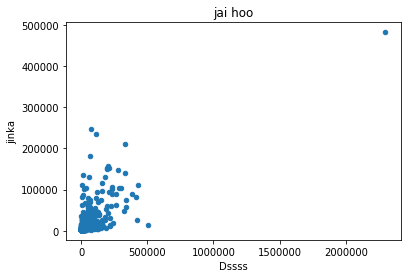

In [71]:
fortune.plot('Employees',"Revenue", kind = 'scatter' );
plt.title("jai hoo")

In [80]:
bigmac["Date"].dt.m

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
622    1
623    1
624    1
625    1
626    1
627    1
628    1
629    1
630    1
631    1
632    1
633    1
634    1
635    1
636    1
637    1
638    1
639    1
640    1
641    1
642    1
643    1
644    1
645    1
646    1
647    1
648    1
649    1
650    1
651    1
Name: Date, Length: 652, dtype: int64